# P4W4: Meta-heuristieken

In [2]:
import math
import numpy as np
import pandas as pd
from simanneal import Annealer
import inspyred
from inspyred import ec
from random import Random

## 1. Simulated Annealing

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


[-0.00630005  0.00996862] : 0.0275817906515492


(array([ 0.00423965, -0.00399429]), 0.006730875003729153)


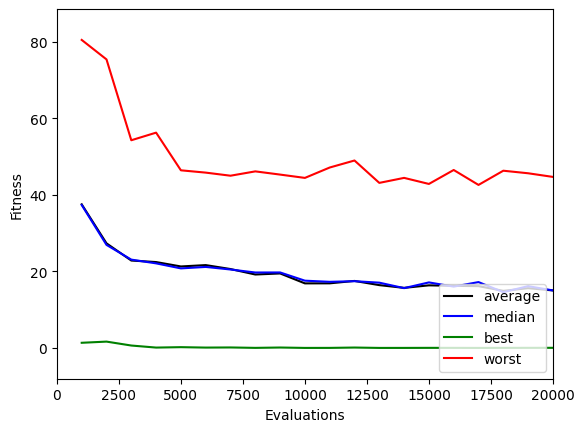

In [3]:
def generate(random = None, args = None):   # genereert 1 individu
    size = args.get('num_inputs',2)    # num_inputs is passed as parameter in evolve fc, if not defined: default is 2
    return np.random.uniform(low=-1, high=1, size=size)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:    # fitness uitrekenen voor alle individuen
        sum = 10 * len(candidate)
        for i in range(0,len(candidate)):
            sum = sum + (candidate[i]**2 - 10 * math.cos(2*math.pi*candidate[i]))
        fitness.append(sum)
    return fitness
rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination  # wanneer stoppen: na max_evaluations (wij gebruiken altijd deze)
#ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # als 0-1 vector
ga.variator = [ec.variators.arithmetic_crossover,
               ec.variators.gaussian_mutation]  # als real: crosover = gemiddelde van ouders, mutation = kleine afwijking
ga.observer = ec.observers.plot_observer  # toevoegen als je plot wil
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    selector=ec.selectors.fitness_proportionate_selection,  # voor roulettewiel
    #selector = ec.selectors.tournament_selection,  # voor tournament
    pop_size=1000,  # population size
    maximize=False,  # zoek je max of min?
    bounder=ec.Bounder(-5.12, 5.12),
    max_evaluations=20000,
    mutation_rate=0.25,
    num_inputs=2)  # eigen gedefinieerde parameter
population.sort(reverse=True)  # dan is 1ste de beste van de laatste populatie
print(population[0])
## 3. Traveling salesman
distance_matrix = np.array([[0, 100, 125, 100, 75],
                            [100, 0, 50, 75, 100],
                            [125, 50, 0, 100, 125],
                            [100, 75, 100, 0, 50],
                            [75, 100, 125, 50, 0]])
distance_matrix = distance_matrix.reshape([25])
distance_matrix
# route definieren als 0-1 verctor
route = np.array([[0, 1, 0, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 1],
                  [1, 0, 0, 0, 0]])
route = route.reshape([-1])  # omvormen naar 1-dimensionale array
route


class RastriginProblem(Annealer):
    def energy(self):
        x1 = self.state[0]
        x2 = self.state[1]
        sum = 10 * 2 + self.state[0]**2 + self.state[1]**2
        sum = sum - 10 * math.cos(2 * math.pi * self.state[0]) - 10 * math.cos(2 * math.pi * self.state[1])
        return sum    # + want minimum

    def move(self):
        i = np.random.randint(0,2)
        self.state[i] += np.random.normal(0, 0.1)
        self.state[i] = np.clip(self.state[i], -5.12, 5.12)

# minimum = 0 in (0,0)
init_sol =  np.random.uniform(-5.12,5.12, size=2) #initial solution: array met 2 elementen
rastrigin=RastriginProblem(init_sol)
# set annealing parameters, if not default values will be used
rastrigin.Tmax = 25000.0 
rastrigin.Tmin = 2.5 
rastrigin.updates = 10
rastrigin.steps = 100000
opt_sol = rastrigin.anneal()
print(opt_sol)

## 2. Traveling Salesman

In [4]:
distance_matrix = np.array([[0, 100, 125, 100,  75],
                            [100, 0,  50,  75, 100],
                            [125, 50,  0, 100, 125],
                            [100, 75, 100,   0, 50],
                            [75, 100, 125,  50,  0]]) 

In [5]:
class TravellingSalesmanProblem(Annealer):
    def move(self):
        """Swaps two cities in the route."""
        a = np.random.randint(0, len(self.state) - 1)
        b = np.random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]
        
    def energy(self):
        """Calculates the length of the route."""
        dist = 0
        for i in range(len(self.state)):
            dist += distance_matrix[self.state[i - 1], self.state[i]]
        return dist

initial_state = [0, 4, 1, 3, 2]
tsp = TravellingSalesmanProblem(initial_state)
route, distance = tsp.anneal()
route, distance

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


([0, 4, 3, 1, 2], 375)